In [275]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [276]:
# 1)
G = 6.67*10**(-11) # m^3/kg*s^2 Newtonian Grav
me = 5.97219*10**24 #kg Earth Mass
mm = 7.34767309*10**22 # kg Moon Mass
re = 6.371e6 # m Earth Radius
rm = 1.74e6 # m Moon Radius
rem = 3.84e8 # m Earth to Moon radius
mr = 10000 #kg

In [277]:
#def TE(t,state,G,me,mm,re,rm,rem,mr):
#    x,v = state
#    dx_dt = v
#    unet = (G*mm)/(x+re)**2 + (-G*m|e)/(rem-x)**2
#    KE = 0.5*mr*(v)**2
#    dv_dt = (unet + KE)*x
#    return [dx_dt,dv_dt]
    
def state1(t,state,mr,G,mm,me,rem): # Solving for position and velocity(measuring in one dimension)
    x,v = state 
    dx_dt = v
    dv_dt = ((G*mm)/(rem-x)**2 + (-G*me)/(x)**2)
    return [dx_dt,dv_dt]

# UE = -((G*me*mr)/(x+re) + (G*mm*mr)/(rm + rem)) UNET
# KE = 0.5mv^2 -> 0.5*m*dx/dt^2 KNET 

In [278]:
def bte(t,state,mr,G,mm,me,rem): # Fell Back to Earth
    x,v = state
    return x-re
bte.terminal = True

def mtm(t,state,mr,G,mm,me,rem): # Made to Moon
    x,v, = state
    return rem-x
mtm.terminal = True

In [279]:
tspan = [0,3*24*3600]
xo = re + 50.0e3
vo = 13.85e3
dt = np.arange(0,tspan[1],0.1)
sol = solve_ivp(state1, tspan, [xo,vo], args = (mr,G,mm,me,rem,), method="RK45",t_eval = dt, dense_output=True,events=(bte,mtm))

In [280]:
#print(len(sol.t)) # Length of time value array
#print(len(sol.y[1])) # Length of force value array -> same as veloicty array

In [281]:
print(sol)

  message: A termination event occurred.
  success: True
   status: 1
        t: [ 0.000e+00  1.000e-01 ...  4.352e+04  4.352e+04]
        y: [[ 6.421e+06  6.422e+06 ...  3.840e+08  3.840e+08]
            [ 1.385e+04  1.385e+04 ...  8.373e+03  8.373e+03]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x0000024718CB37D0>
 t_events: [array([], dtype=float64), array([ 4.352e+04])]
 y_events: [array([], dtype=float64), array([[ 3.840e+08,  8.373e+03]])]
     nfev: 62
     njev: 0
      nlu: 0


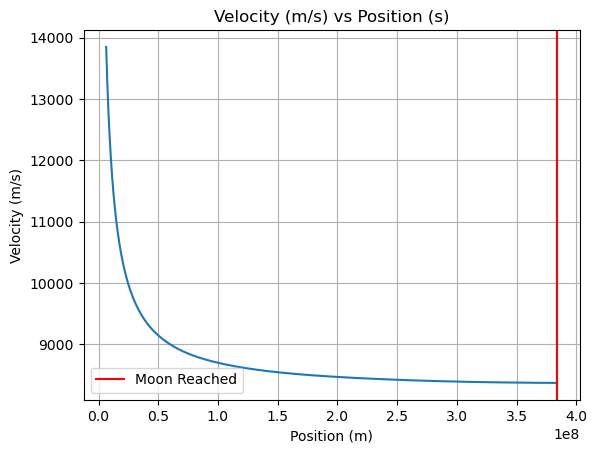

In [282]:
plt.plot(sol.y[0],sol.y[1])

plt.axvline(rem, color = 'red', label = 'Moon Reached')
plt.xlabel('Position (m)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity (m/s) vs Position (s)')
plt.grid()
plt.legend()

System Energy Lost as Percentage 8.866715230482214e-06


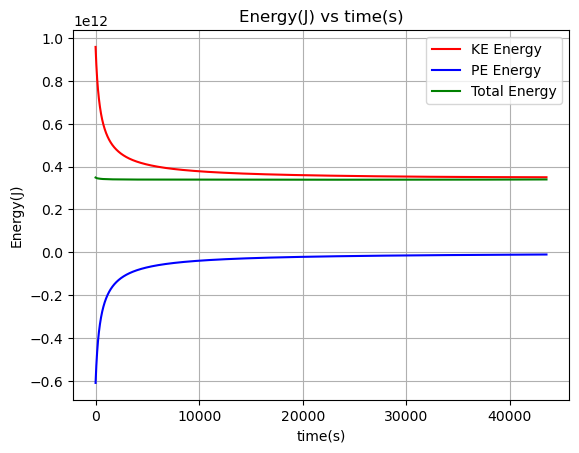

In [283]:
KE =  0.5*mr*(sol.y[1])**2
PE = -((G*me*mr)/(sol.y[0]) + (G*mm*mr)/(rm - sol.y[0])) 
TE = KE+PE
syseng=np.absolute(1-max(TE)/TE[1])
print('System Energy Lost as Percentage',syseng)
plt.plot(sol.t,KE,color='red',label='KE Energy')
plt.plot(sol.t,PE,color='blue',label='PE Energy')
plt.plot(sol.t,TE,color='green',label='Total Energy')
plt.ylabel('Energy(J)')
plt.xlabel('time(s)')
plt.title('Energy(J) vs time(s)')
plt.grid()
plt.legend()

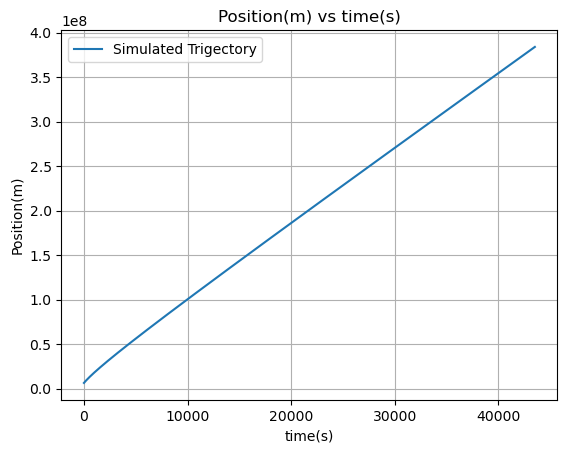

In [284]:
plt.plot(sol.t,sol.y[0],label='Simulated Trigectory')
plt.xlabel('time(s)')
plt.ylabel('Position(m)')
plt.title('Position(m) vs time(s)')
plt.grid()
plt.legend()

In [285]:
print('Given a starting velocity of',vo,' m/s we reach the moon at',max(sol.t)/3600,'hrs using the mouse trap when the craft',
      '\nreaches the moon.')

Given a starting velocity of 13850.0  m/s we reach the moon at 12.089722222222223 hrs using the mouse trap when the craft 
reaches the moon.


In [286]:
# 2)
m = 80
L = 4.0
g = 9.8

In [287]:
def swing(t,state,m,L,g):
    theta,w = state
    dtheta_dt = w
    dw_dt = (-m*g*L*np.sin(theta))/(m*L**2)
    
    return [dtheta_dt,dw_dt]

In [288]:
wO = np.sqrt(g/L)
thetaO = np.radians(90)
tspan1 = [1,2.5/(wO/(2*np.pi))]

In [289]:
sol1 = solve_ivp(swing, tspan1, [thetaO,wO], args=(m,L,g), method="RK45", dense_output=True)

In [290]:
t1 = np.arange(0,2.5*(2*np.pi/wO),0.1)
inter=sol1.sol(t1)

In [291]:
#print(inter)

In [292]:
print(sol1)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 1.000e+00  1.095e+00 ...  1.003e+01  1.004e+01]
        y: [[ 1.571e+00  1.708e+00 ... -2.081e+00 -2.079e+00]
            [ 1.565e+00  1.334e+00 ...  1.948e-01  2.071e-01]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x00000247168C8F10>
 t_events: None
 y_events: None
     nfev: 122
     njev: 0
      nlu: 0


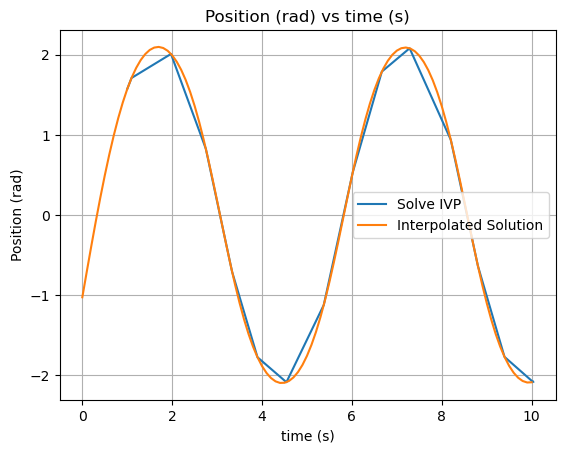

In [293]:
plt.plot(sol1.t,sol1.y[0],label='Solve IVP')
plt.plot(t1,inter[0],label='Interpolated Solution')
plt.xlabel('time (s)')
plt.ylabel('Position (rad)')
plt.title('Position (rad) vs time (s)')
plt.grid()
plt.legend()

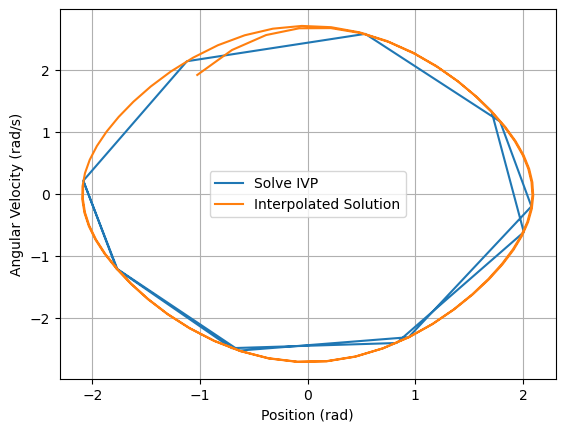

In [294]:
plt.plot(sol1.y[0],sol1.y[1],label='Solve IVP')
plt.plot(inter[0],inter[1],label='Interpolated Solution')
plt.xlabel('Position (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.grid()
plt.legend()

In [295]:
print('Given that we can determine the Inertia = mL^3/3 + ma^2 + maL','\n\n From the referance video, the kiikers will crouch down then stand up.',
       '\nThis translates to a change in a and L.', '\n We would need to interpret intertia using uniform distribution.',
       '\n The major change we can see from the simplified model in the simulation is the addition of ma^2 + maL and we can visually see an increase of speed when the kiikers crouch down.',
       '\n Standing up given points of reaching the peak of the swing, not only adds a larger L but adds energy to the system from the \nmovement down against the swing')

Given that we can determine the Inertia = mL^3/3 + ma^2 + maL 

 From the referance video, the kiikers will crouch down then stand up. 
This translates to a change in a and L. 
 We would need to interpret intertia using uniform distribution. 
 The major change we can see from the simplified model in the simulation is the addition of ma^2 + maL and we can visually see an increase of speed when the kiikers crouch down. 
 Standing up given points of reaching the peak of the swing, not only adds a larger L but adds energy to the system from the 
movement down against the swing


In [296]:
# 3) 
qe = -1.60217663e-19
me = 9.1093837e-31
Be = 50e-6
Re = 6378e3
v0 = 300.0e3
re = 6.371e6 # m Earth Radius

In [297]:
def NL(t,state,qe,me,Be,Re,v0):
    x,y,z,vx,vy,vz = state
    Bx = 0.0
    By = 0.0
    Bz = -Be*(Re/z)**3
    
    dxdt = vx
    dydt = vy
    dzdt = vz
    dvxdt = (qe/me)*(vy*Bz - vz*By)
    dvydt = (qe/me)*(vz*Bx - vx*Bz)
    dvzdt = (qe/me)*(vx*By - vy*Bx)
    return [dxdt,dydt,dzdt,dvxdt,dvydt,dvzdt]

In [298]:
xo = 0.0
yo = 0.0
zo=10.0*re
vxo=v0
vyo = 0
vzo = -v0
tspan2 = [0,1e-2]
#dt2 = np.arange(0,tspan2[1],1)
sol2 = solve_ivp(NL,tspan2,[xo,yo,zo,vxo,vyo,vzo],args=(qe,me,Be,Re,v0,),method = "RK45",dense_output=True)

In [299]:
print(sol2)

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.544e-13 ...  9.981e-03  1.000e-02]
        y: [[ 0.000e+00  1.963e-07 ...  4.792e+00  1.021e+01]
            [ 0.000e+00 -5.667e-16 ... -3.124e-01 -1.543e+00]
            ...
            [ 0.000e+00 -1.732e-03 ... -4.229e+04 -9.014e+04]
            [-3.000e+05 -3.000e+05 ... -3.000e+05 -3.000e+05]]
      sol: <scipy.integrate._ivp.common.OdeSolution object at 0x000002475C5D8F10>
 t_events: None
 y_events: None
     nfev: 662
     njev: 0
      nlu: 0


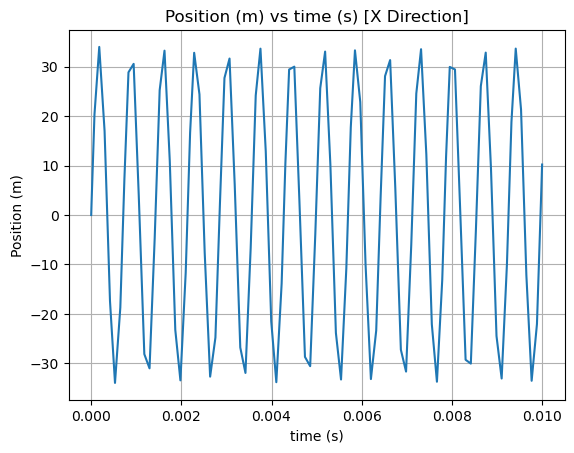

In [300]:
plt.plot(sol2.t,sol2.y[0])
plt.ylabel('Position (m)')
plt.xlabel('time (s)')
plt.title('Position (m) vs time (s) [X Direction]')
plt.grid()

Text(0.5, 1.0, 'Position (m) vs time (s) [X Velocity]')

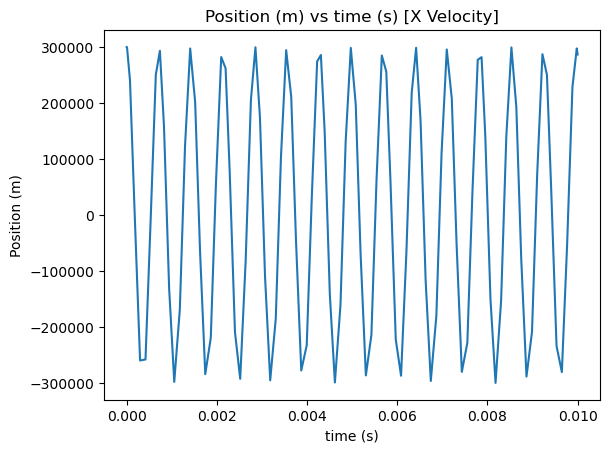

In [301]:
plt.plot(sol2.t,sol2.y[3])
plt.ylabel('Position (m)')
plt.xlabel('time (s)')
plt.title('Position (m) vs time (s) [X Velocity]')

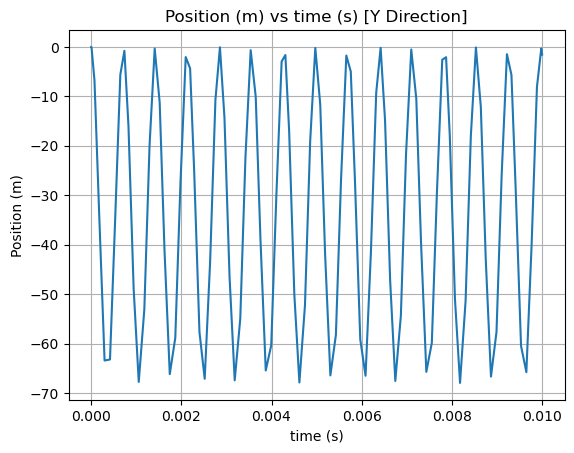

In [302]:
plt.plot(sol2.t,sol2.y[1])
plt.ylabel('Position (m)')
plt.xlabel('time (s)')
plt.title('Position (m) vs time (s) [Y Direction]')
plt.grid()

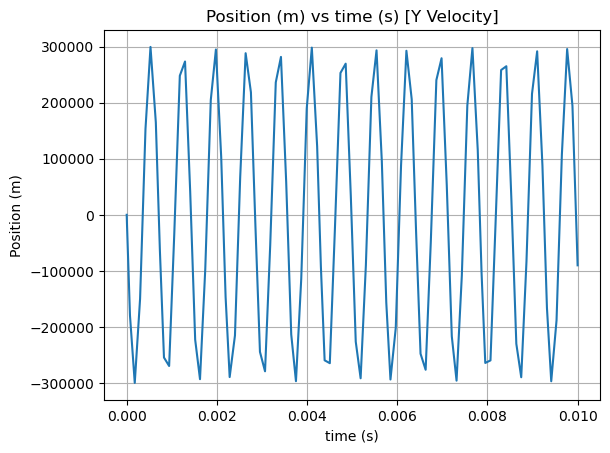

In [303]:
plt.plot(sol2.t,sol2.y[4])
plt.ylabel('Position (m)')
plt.xlabel('time (s)')
plt.title('Position (m) vs time (s) [Y Velocity]')
plt.grid()

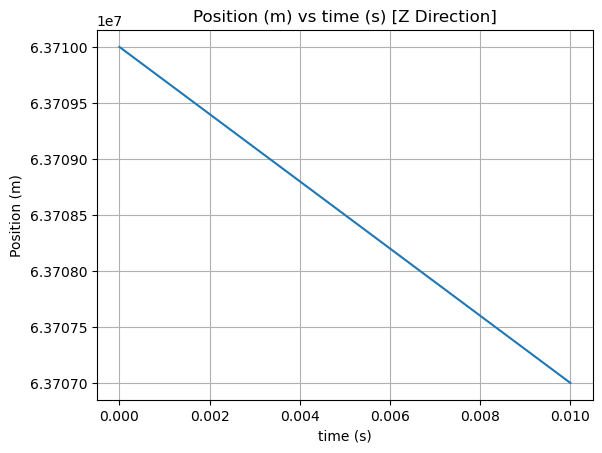

In [304]:
plt.plot(sol2.t,sol2.y[2])
plt.ylabel('Position (m)')
plt.xlabel('time (s)')
plt.title('Position (m) vs time (s) [Z Direction]')
plt.grid()

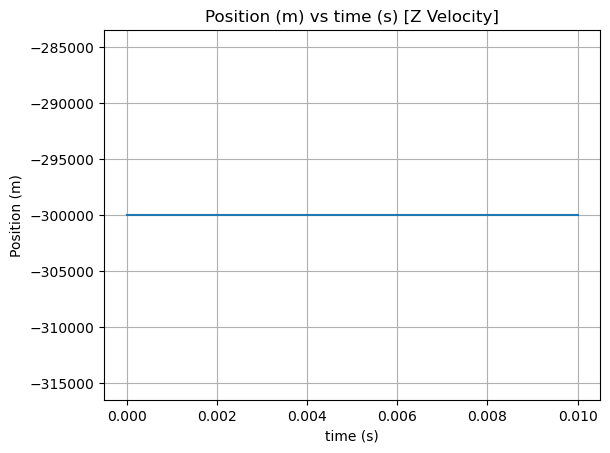

In [305]:
plt.plot(sol2.t,sol2.y[5])
#print(sol2.y[5])
plt.ylabel('Position (m)')
plt.xlabel('time (s)')
plt.title('Position (m) vs time (s) [Z Velocity]')
plt.grid()

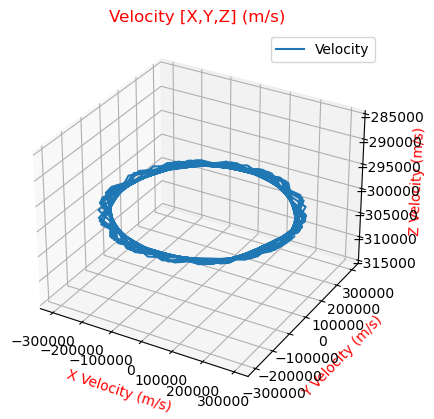

In [306]:
ax=plt.figure().add_subplot(projection='3d')
ax.plot(sol2.y[3],sol2.y[4],sol2.y[5],label='Velocity')
ax.set_xlabel('X Velocity (m/s)',color='red')
ax.set_ylabel('Y Velocity (m/s)',color='red')
ax.set_zlabel('Z Velocity (m/s)',color='red')
ax.set_title('Velocity [X,Y,Z] (m/s)',color='red')
plt.legend()

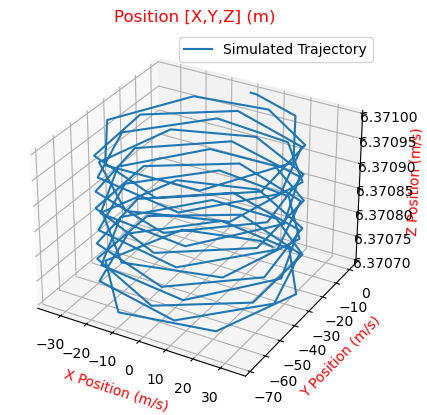

In [307]:
ax1=plt.figure().add_subplot(projection='3d')
ax1.plot(sol2.y[0],sol2.y[1],sol2.y[2],label='Simulated Trajectory')
ax1.set_xlabel('X Position (m/s)',color='red')
ax1.set_ylabel('Y Position (m/s)',color='red')
ax1.set_zlabel('Z Position (m/s)',color='red')
ax1.set_title('Position [X,Y,Z] (m)',color='red')
plt.legend()
plt.show()

In [309]:
print('The Earths magnetic field collects the flux of electrons coming off the sun')

The Earths magnetic field collects the flux of electrons coming off the sun
